In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2023-01-31 16:57:56.546748: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images, labels = C.Helper.load(DATAPATH)

In [4]:
images, labels = C.Helper.shuffle(images, labels)

In [5]:
images, labels = C.Helper.normalize(images, labels)

In [6]:
X_train, X_val, y_train, y_val = C.Helper.split(images, labels, val_size=0.2)

In [7]:
train_gen = C.Helper.augment(X_train, y_train)

In [9]:
model = C.Helper.create_unet((512,512,1))

2023-01-31 17:04:17.918702: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-31 17:04:17.923907: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-31 17:04:18.436983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-31 17:04:18.437039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-01-31 17:04:18.437045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-01-31 17:04:18.446397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 38425 MB memory) -> physical GPU (device: 0, name: A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capabili

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout2d (SpatialDropo (None, 512, 512, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 64) 36928       spatial_dropout2d[0][0]          
______________________________________________________________________________________________

In [13]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_val, y_val, epochs=200)

2023-01-28 18:44:20.396869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-28 18:44:20.398332: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-01-28 18:44:21.692992: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-28 18:44:22.408458: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-01-28 18:44:23.135794: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-01-28 18:44:23.135819: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-01-28 18:44:23.135888: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-28 18:44:23.217054: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-28 18:44:23.919205: I tensorflow/stream_exec

13/13 [==============================] - 48s 2s/step - loss: 1.6822 - iou: 9.4133e-05 - iou_thresholded: 5.3495e-04 - val_loss: 0.0496 - val_iou: 7.2680e-06 - val_iou_thresholded: 7.0619e-04
Epoch 2/200
13/13 [==============================] - 13s 973ms/step - loss: 0.0408 - iou: 1.4156e-04 - iou_thresholded: 4.7853e-04 - val_loss: 0.0047 - val_iou: 6.8168e-04 - val_iou_thresholded: 0.0011
Epoch 3/200
13/13 [==============================] - 13s 967ms/step - loss: 0.0040 - iou: 2.3719e-04 - iou_thresholded: 5.8393e-04 - val_loss: 0.0029 - val_iou: 6.2098e-04 - val_iou_thresholded: 0.0011
Epoch 4/200
13/13 [==============================] - 13s 967ms/step - loss: 0.0028 - iou: 3.2015e-04 - iou_thresholded: 5.4456e-04 - val_loss: 0.0025 - val_iou: 6.5262e-04 - val_iou_thresholded: 0.0011
Epoch 5/200
13/13 [==============================] - 13s 969ms/step - loss: 0.0024 - iou: 4.0280e-04 - iou_thresholded: 5.5390e-04 - val_loss: 0.0023 - val_iou: 8.3138e-04 - val_iou_thresholded: 0.0011
E

13/13 [==============================] - 13s 964ms/step - loss: 2.4277e-04 - iou: 0.5414 - iou_thresholded: 0.6472 - val_loss: 3.7893e-04 - val_iou: 0.4858 - val_iou_thresholded: 0.5658
Epoch 84/200
13/13 [==============================] - 13s 971ms/step - loss: 2.4630e-04 - iou: 0.5391 - iou_thresholded: 0.6483 - val_loss: 3.6189e-04 - val_iou: 0.4810 - val_iou_thresholded: 0.5705
Epoch 85/200
13/13 [==============================] - 13s 969ms/step - loss: 2.4011e-04 - iou: 0.5457 - iou_thresholded: 0.6482 - val_loss: 3.6574e-04 - val_iou: 0.4857 - val_iou_thresholded: 0.5704
Epoch 86/200
13/13 [==============================] - 13s 967ms/step - loss: 2.3501e-04 - iou: 0.5401 - iou_thresholded: 0.6542 - val_loss: 3.4549e-04 - val_iou: 0.4930 - val_iou_thresholded: 0.6026
Epoch 87/200
13/13 [==============================] - 13s 1s/step - loss: 2.3257e-04 - iou: 0.5472 - iou_thresholded: 0.6588 - val_loss: 3.6856e-04 - val_iou: 0.4756 - val_iou_thresholded: 0.5859
Epoch 88/200
13/13 [=

13/13 [==============================] - 13s 966ms/step - loss: 1.4147e-04 - iou: 0.6785 - iou_thresholded: 0.7677 - val_loss: 4.2592e-04 - val_iou: 0.5282 - val_iou_thresholded: 0.5759
Epoch 166/200
13/13 [==============================] - 13s 966ms/step - loss: 1.3825e-04 - iou: 0.6928 - iou_thresholded: 0.7763 - val_loss: 4.0899e-04 - val_iou: 0.5298 - val_iou_thresholded: 0.5897
Epoch 167/200
13/13 [==============================] - 13s 965ms/step - loss: 1.3929e-04 - iou: 0.6865 - iou_thresholded: 0.7747 - val_loss: 4.2660e-04 - val_iou: 0.5289 - val_iou_thresholded: 0.5822
Epoch 168/200
13/13 [==============================] - 13s 970ms/step - loss: 1.4285e-04 - iou: 0.6818 - iou_thresholded: 0.7696 - val_loss: 4.5810e-04 - val_iou: 0.5316 - val_iou_thresholded: 0.5712
Epoch 169/200
13/13 [==============================] - 13s 966ms/step - loss: 1.4293e-04 - iou: 0.6865 - iou_thresholded: 0.7653 - val_loss: 4.5066e-04 - val_iou: 0.5379 - val_iou_thresholded: 0.5844
Epoch 170/200


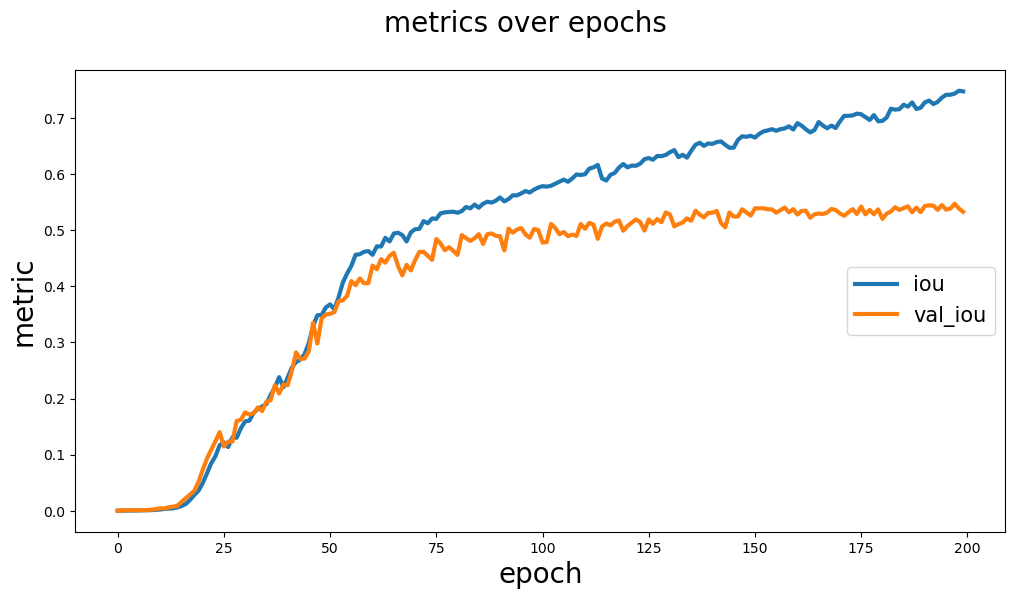

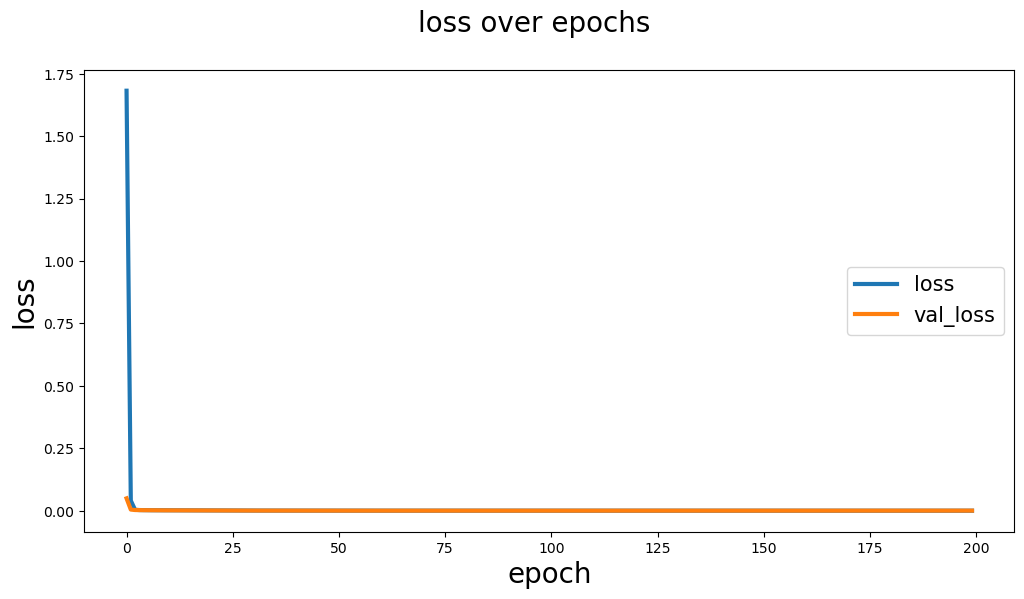

In [14]:
from keras_unet.utils import plot_segm_history
plot_segm_history(history)

In [15]:
y_pred = model.predict(X_val)

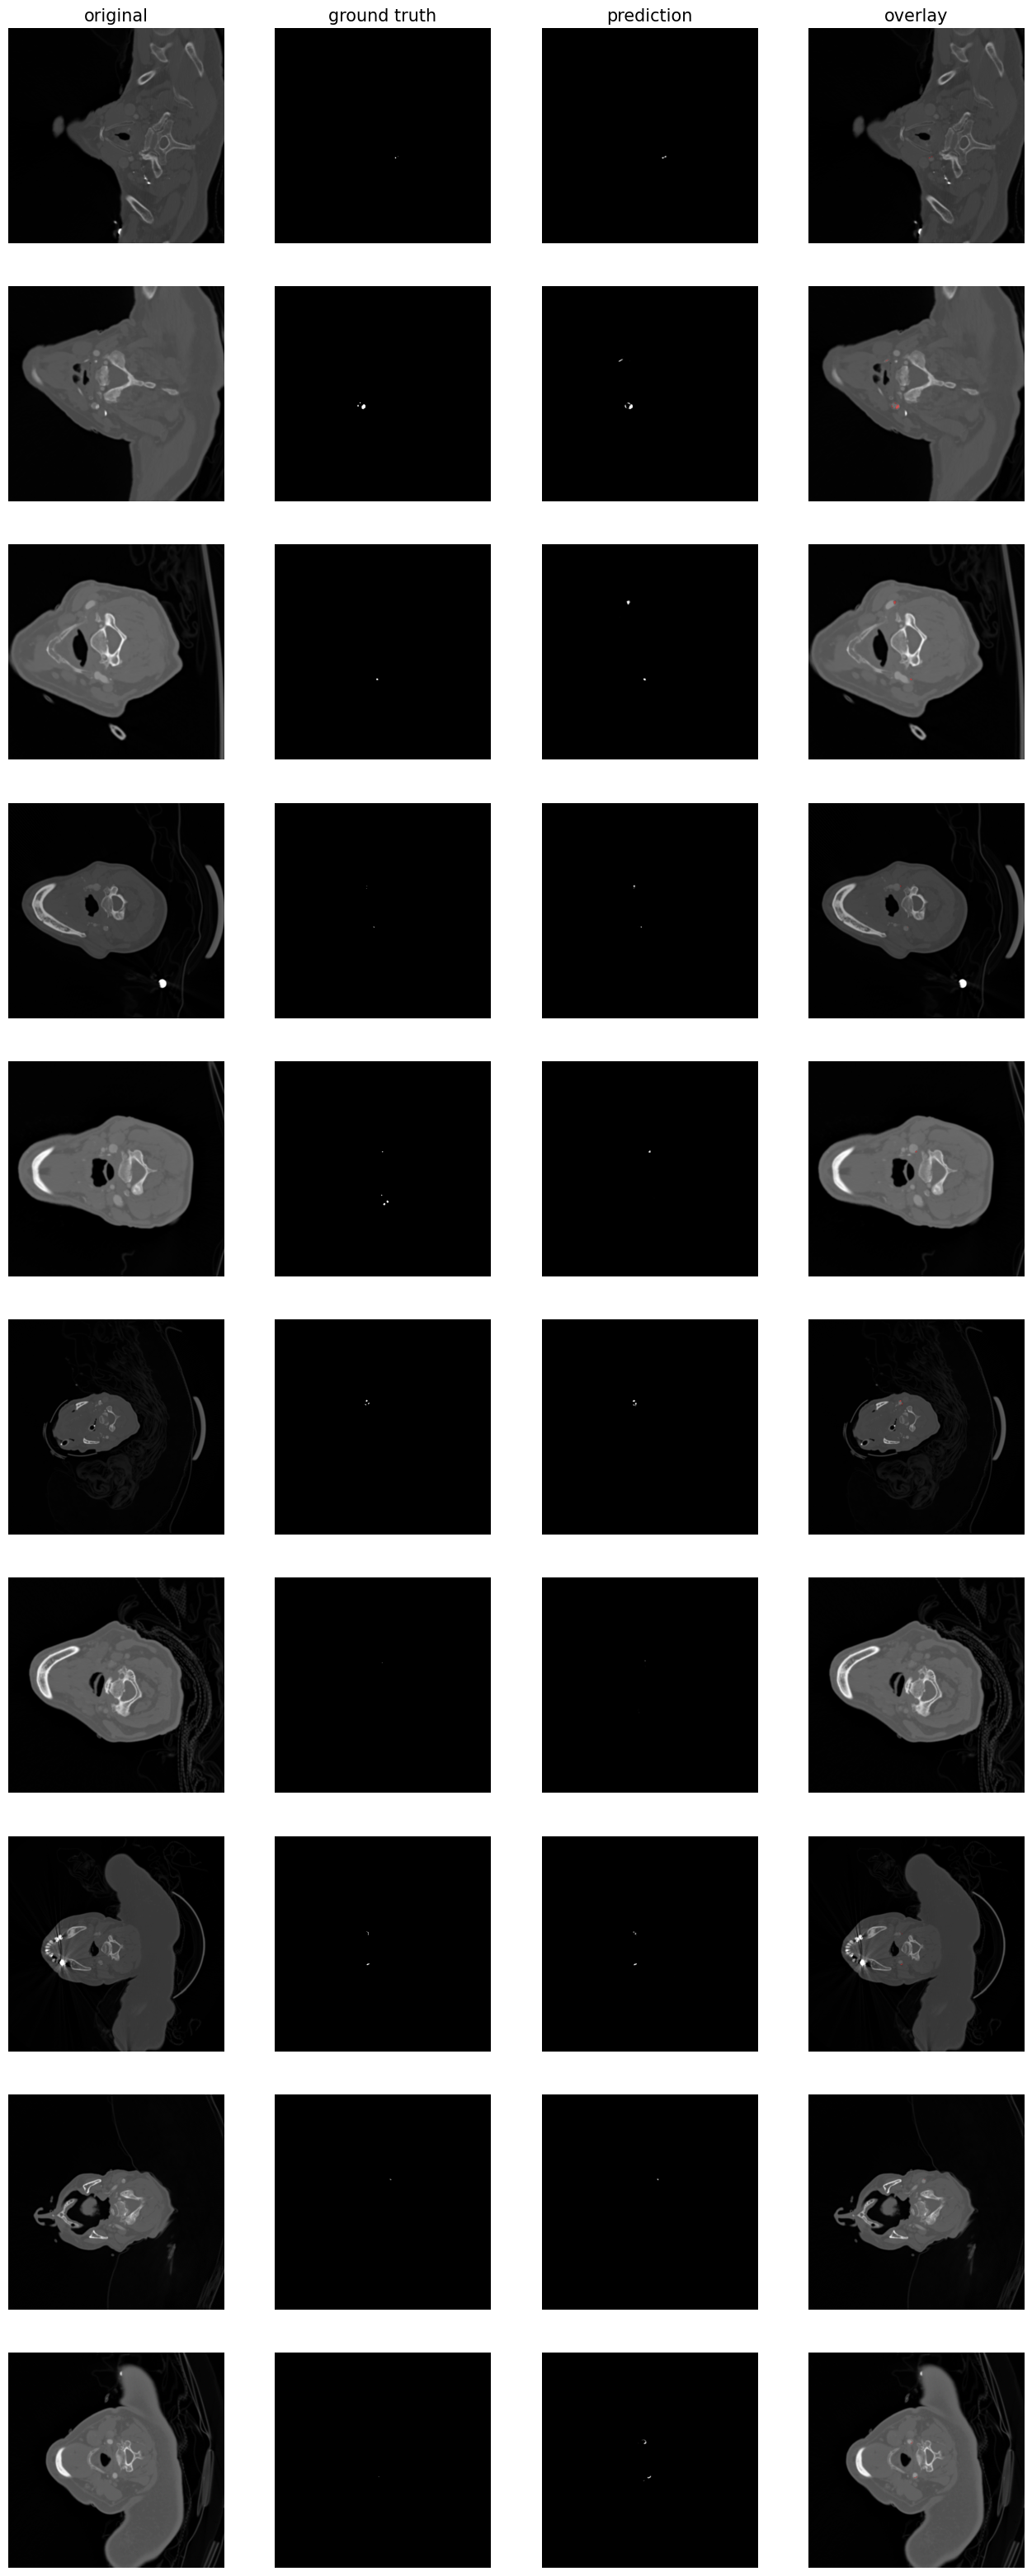

In [16]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [17]:
loss, iou, iou_thresholded = model.evaluate(X_val, y_val)

4/4 [==============================] - 1s 156ms/step - loss: 5.1234e-04 - iou: 0.5328 - iou_thresholded: 0.5688


In [18]:
import mahotas as mh

In [22]:
X_val_c = []
y_val_c = []
y_pred_c = []

for i,z in enumerate(X_val):
    
    image = X_val[i]
    label = y_val[i]
    pred = y_pred[i]
    
    bbox = mh.bbox(label)
    incr=30
    X_val_c.append(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_val_c.append(label[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_pred_c.append(pred[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])


In [27]:
maxX = 0
maxY = 0

for i,z in enumerate(X_val_c):
    
    maxX = max(z.shape[1], maxX)
    maxY = max(z.shape[0], maxY)
    
X_val_c_np = np.zeros((len(X_val_c), maxY, maxX,1), dtype=X_val.dtype)
y_val_c_np = np.zeros((len(y_val_c), maxY, maxX,1), dtype=y_val.dtype)
y_pred_c_np = np.zeros((len(y_pred_c), maxY, maxX,1), dtype=y_pred.dtype)

for i,z in enumerate(X_val_c):
    
    image = X_val_c[i]
    label = y_val_c[i]
    pred = y_pred_c[i]
    
    X_val_c_np[i][0:image.shape[0], 0:image.shape[1],:] = image
    y_val_c_np[i][0:label.shape[0], 0:label.shape[1],:] = label
    y_pred_c_np[i][0:pred.shape[0], 0:pred.shape[1],:] = pred
    

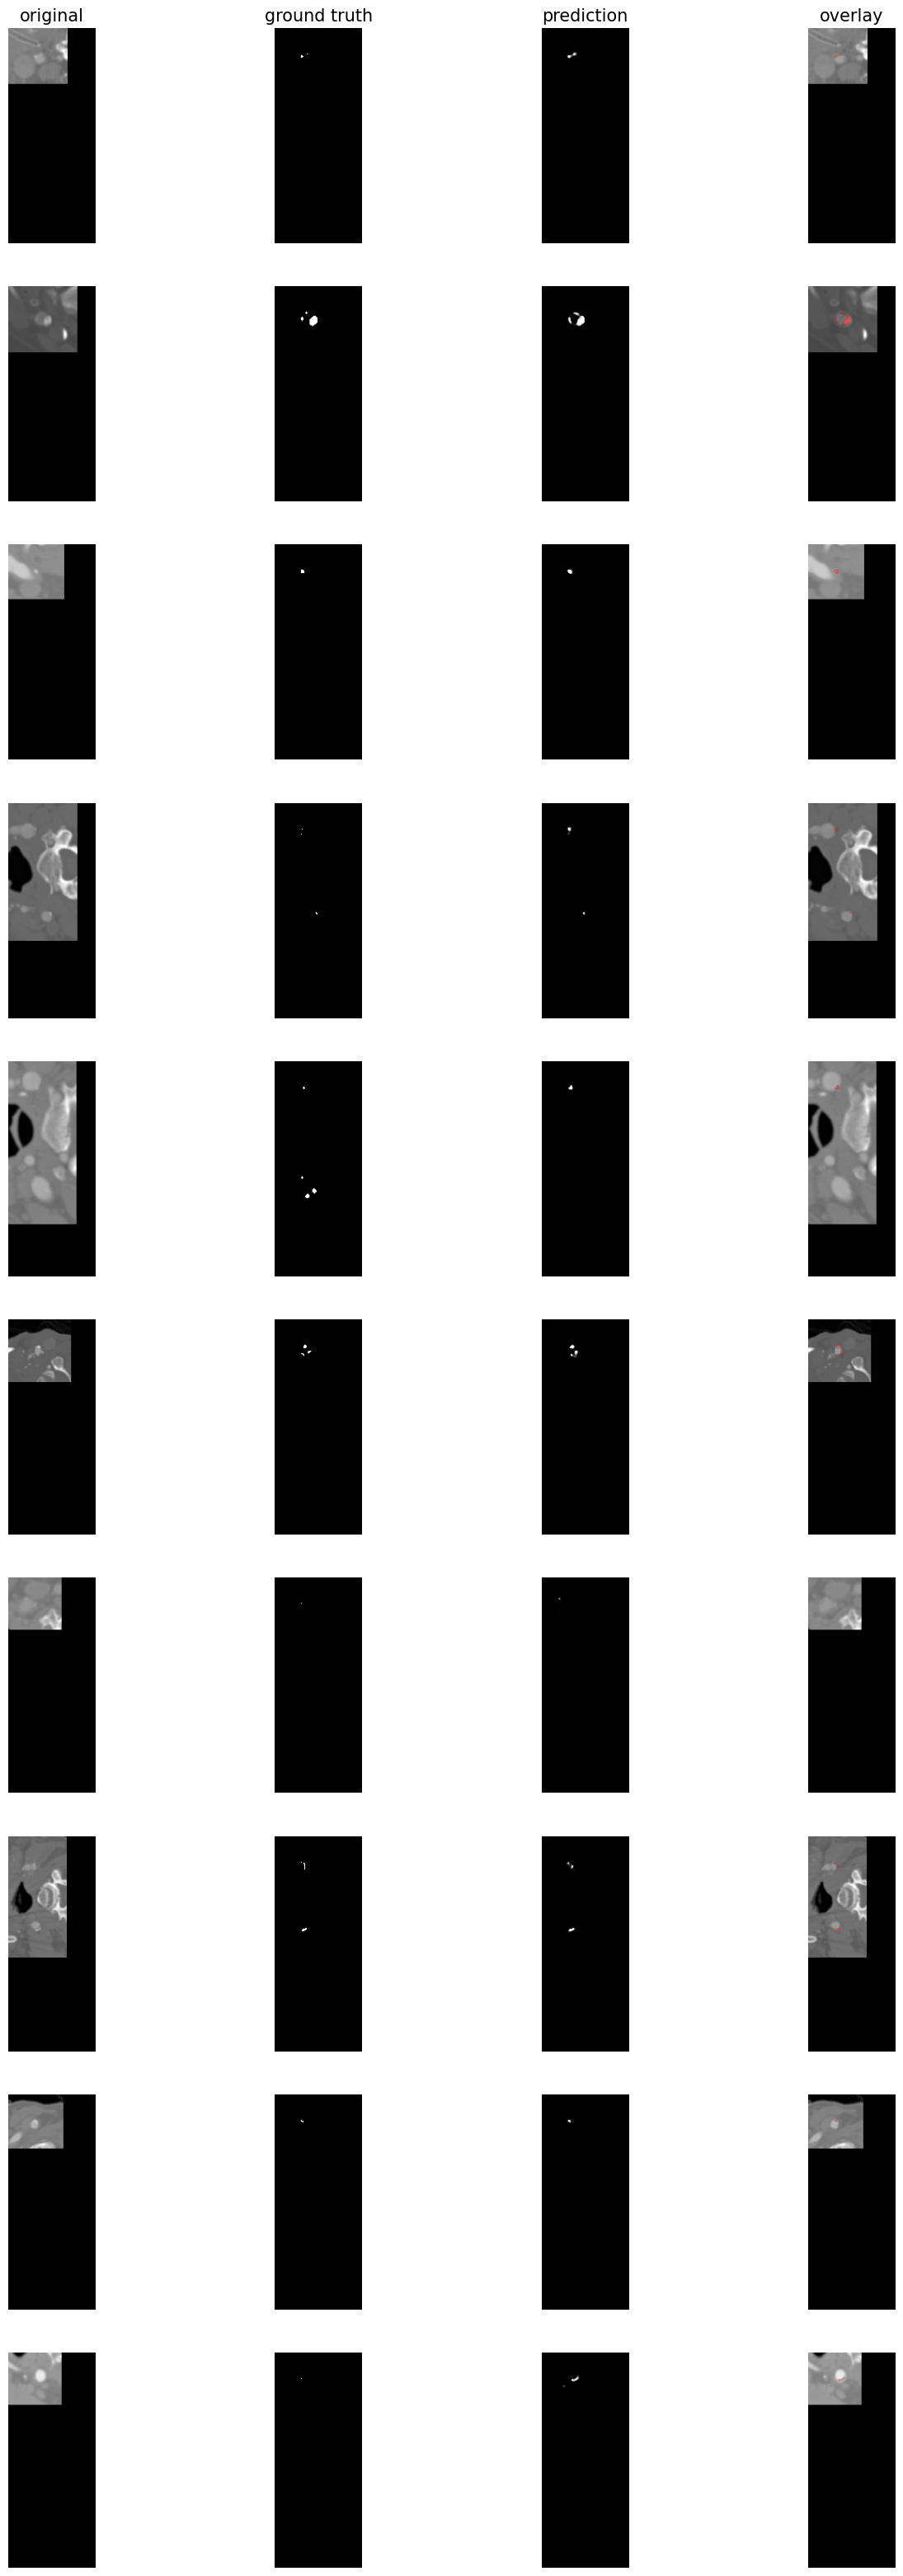

In [29]:
plot_imgs(org_imgs=X_val_c_np, mask_imgs=y_val_c_np, pred_imgs=y_pred_c_np)

In [31]:
model.save_weights('/raid/mpsych/CACTAS/unet_full_33_cases_weights.hdf5')

In [32]:
model.save('/raid/mpsych/CACTAS/unet_full_33_cases.hdf5')